# Chapter 11. Deep Learning in Chemistry

## 11.1. Perceptron

In this section, we will explore the structure of a perceptron, learn about how it work, and use single-perceptron networks to solve simple linear regression problems.

### 11.1.1. Structure of Perceptron

The structure of a perceptron can be described as follow:
![Single layer perceptron](images/perceptron_structure.jpg)

**Key points to remember about perceptron**

- A perceptron can have 1 or multiple inputs, and only 1 output
- A perceptron contains the weights (w) for each of the inputs, and a bias (b)
- The output of a perceptron is calculated using the following equation:

$$\text{output} = \sum_{i}(w_i \times x_i) + b$$

Here, $w_i$ represents the weight associated with the i<sup>th</sup> input, $x_i$ is the i<sup>th</sup> input, and $b$ is the bias term. The perceptron computes a weighted sum of its inputs, adds a bias, and then applies an activation function to produce the output.

### 11.1.2. How Single-Perceptron Network Works

#### 11.1.2.1. General Concept

Single-perceptron network, or any other artificial neural network (ANN), works on the basic of **gradient descent**.
You can think of an ANN as a mathematic expression that maps the inputs to the outputs:
![ANN](images/ANN.png)
In general, to use an ANN to solve a regression problem, you need to follow these step:
- **Step 1.** Initialize the parameters (weights and biases) of each neuron in the network randomly.
- **Step 2.** Forward pass: Pass the input values to the network, calculate the output of each neuron in the network in order, until we get the output values.
- **Step 3.** Calculate the value of the loss function.
- **Step 4.** Backward pass: Calculate the gradients for all weights and biases in the network with respect to the loss function
- **Step 5.** Update the values of weights and biases so that they can lower the loss function.
- Return to **Step 2**, repeat after a number of iterations (epochs) or until the loss function is low enough.

The loop from step 2 to step 5 is called the **training process**.

#### 11.1.2.2. The Workflow of a Single-Perceptron Network

An example of a single-perceptron network with 3 inputs is below:
![Single-perceptron network](images/single-perceptron_network_3_inputs.png)
We will test this network for the regression of function $y = x_1 - 3.x_2 + 2.x_3$, using 1 single data point: $x_1 = 3.4$, $x_2 = 2.4$, $x_3 = -1.7$ → $y = -7.2$.

Following the general workflow:
- **Step 1.** Initialize the parameters:
![Single-perceptron network](images/single-perceptron_network_3_inputs_step1.png)

- **Step 2.** Forward:
![Single-perceptron network](images/single-perceptron_network_3_inputs_step2.png)

- **Step 3.** Calculate the loss function. We use MSE loss function in this case:

$$\text{MSE Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

with $n = 1$ (1 data point), $y = -7.2$ (observed value), $\hat{y} = 0.38$ (predicted value) → $MSE Loss = 57.5$

- **Step 4.** Backward:

We cannot calculate the gradients for weights and bias directly. We have to use the chain rule.

$$\frac{\partial \text{MSE}}{\partial \hat{y}} = -2 \times (y - \hat{y}) = 15.16$$

$$\frac{\partial \hat{y}}{\partial w_1} = x_1 = 3.4 \rightarrow \frac{\partial \text{MSE}}{\partial w_1} = \left(\frac{\partial \text{MSE}}{\partial \hat{y}}\right) \times \left(\frac{\partial \hat{y}}{\partial w_1}\right) = 15.16 \times 3.4 = 51.544$$

$$\frac{\partial \hat{y}}{\partial w_2} = x_2 = 2.4 \rightarrow \frac{\partial \text{MSE}}{\partial w_2} = \left(\frac{\partial \text{MSE}}{\partial \hat{y}}\right) \times \left(\frac{\partial \hat{y}}{\partial w_2}\right) = 15.16 \times 2.4 = 36.384$$

$$\frac{\partial \hat{y}}{\partial w_3} = x_3 = -1.7 \rightarrow \frac{\partial \text{MSE}}{\partial w_3} = \left(\frac{\partial \text{MSE}}{\partial \hat{y}}\right) \times \left(\frac{\partial \hat{y}}{\partial w_3}\right) = 15.16 \times (-1.7) = -25.772$$

$$\frac{\partial \hat{y}}{\partial b} = 1 \rightarrow \frac{\partial \text{MSE}}{\partial b} = \frac{\partial \text{MSE}}{\partial \hat{y}} = 15.16$$

![Single-perceptron network](images/single-perceptron_network_3_inputs_step4.png)

- **Step 5.** Update weights and bias:

Choose a learning rate: $lr = 0.001$

$$w_1 = w_1 - \left( \frac{\partial \text{MSE}}{\partial w1} \right) \times \text{lr} = w1 - 51.544 \times 0.001 = 0.248$$

$$w_2 = w_2 - \left( \frac{\partial \text{MSE}}{\partial w2} \right) \times \text{lr} = w2 - 36.384 \times 0.001 = -0.536$$

$$w_3 = w_3 - \left( \frac{\partial \text{MSE}}{\partial w3} \right) \times \text{lr} = w3 - (-25.772) \times 0.001 = 0.226$$

$$b = b - \left( \frac{\partial \text{MSE}}{\partial b} \right) \times \text{lr} = b - 15.16 \times 0.001 = 0.885$$

![Single-perceptron network](images/single-perceptron_network_3_inputs_step5.png)

- Return to **Step 2** and continue

**Note:** If we continue running this loop, the values of weights and bias will approaching their target values ($w_1 → 1$, $w_2 → -3$, $w_3 → 2$, $b → 0$), the output will get closer to the observed values, and the MSE loss will approach its mininum.

### 11.1.3. PyTorch Implementation of Perceptron

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab, widely used for applications in deep learning and artificial intelligence. Known for its flexibility and dynamic computational graph, it provides a rich ecosystem for developing and training neural network models efficiently and intuitively. PyTorch is particularly favored for its ease of use, simplicity in debugging, and strong support for GPU acceleration, making it a popular choice among researchers and developers in the field of AI.

To install PyTorch, visit their [website](https://pytorch.org/) for instruction.

#### 11.1.3.1. Single-perceptron network with 1 input, no scaling

In this section, we will use a single-perceptron network to perform linear regression for function $y = f(x)$:

*Network structure:*
![Single-perceptron network](images/single-perceptron_network_1_input.png)

**a. Import modules**

In [ ]:
# Install matplotlib extension for JupyterLab
!conda install -c conda-forge ipympl

In [1]:
# Import modules
import math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

**b. Load data**

In [ ]:
# Define the data points
x = torch.tensor([1.01, 2.03, 3.01, 4.07, 5.09])
y = torch.tensor([2.02, 4.04, 6.05, 8.03, 10.08])

**c. Create model**

In [ ]:
# Define the linear regression class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature and one output

    def forward(self, x):
        return self.linear(x)

In [ ]:
# Instantiate the model
model = LinearRegressionModel()

**d. Training**

In [ ]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Define the train function
def train(x, y):
    # Forward pass
    outputs = model(x.unsqueeze(1))
    loss = criterion(outputs, y.unsqueeze(1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()

In [ ]:
# Create lists of parameters and losses for visualization
w_values = []
b_values = []
losses = []

In [ ]:
# Train the model
num_epochs = 100
progress_bar = tqdm(range(num_epochs))
for epoch in progress_bar:
    train_loss = train(x, y)
    
    # Get the trained parameters
    w = model.linear.weight.item()
    b = model.linear.bias.item()
    
    # Add trained parameters to their lists for visualization
    w_values.append(w)
    b_values.append(b)
    losses.append(train_loss)
    
    # Print progress
    progress_bar.set_description(f'Epoch [{epoch+1}/{num_epochs}], Train loss: {train_loss:.4f}') 

**e. Visualization**

In [ ]:
# Create the axis
x_min = math.floor(torch.min(x).item())
x_max = math.ceil(torch.max(x).item())
y_min = math.floor(torch.min(y).item())
y_max = math.ceil(torch.max(y).item())

# Create the initial plot
fig = plt.figure()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.scatter(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
x_values = np.linspace(x_min, x_max, num=101)
y_values = w_values[0]*x_values + b_values[0]
lines = plt.plot(x_values, y_values)
line = lines[0]

def update(frame):
    # Get the x and y coordinates for the current frame
    y_values = w_values[frame]*x_values + b_values[frame]

    # Update the scatter plot with the current point
    line.set_data(x_values, y_values)

# Create the animation
animation = FuncAnimation(fig, update, frames=num_epochs, interval=200, blit=False)

# Display the animation
plt.show()

In [ ]:
# Visualize MSE loss values over time
fig = plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('MSE loss')

**f. Make prediction**

In [ ]:
# Input for prediction
x_pred = 5

# Convert to tensor
x_pred = torch.tensor([x_pred]).float()

# Run model forward
y_pred = model(x_pred)

# Convert back to number
y_pred = y_pred.item()

# Show result
print(y_pred)

**g. Save and load model**

In [ ]:
# Save model
model_name = 'model_1'
file_name = f'./{model_name}_{num_epochs}.ckpt'
torch.save(model.state_dict(), file_name)

In [ ]:
# Load model
file_name = f'./{model_name}_100.ckpt'
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(file_name))

#### 11.1.3.2. Single-perceptron network with 2 inputs, with scaling

In this section, we will use a single-perceptron network to perform linear regression for function with multiple variables $y = f(x_1, x_2)$:

*Network structure:*
![Single-perceptron network](images/single-perceptron_network_2_inputs.png)

**b. Load data**

In [2]:
# Define the data points
x1 = np.array([1.01, 2.03, 3.01, 4.07, 5.09])
x2 = np.array([9.02, 7.04, 5.05, 3.03, 1.08])
y = 2*x1 - 3*x2 +5

In [12]:
y

array([-20.04, -12.06,  -4.13,   4.05,  11.94])

In [3]:
# Combine x1 and x2 into 1 array
x = np.column_stack((x1, x2))

# Define input and output scalers
input_scaler = MinMaxScaler(feature_range=(0, 1))
output_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data to the range from 0 to 1
x_scaled = input_scaler.fit_transform(x)
y_scaled = output_scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

# Convert to tensor
x_scaled = torch.tensor(x_scaled).float()
y_scaled = torch.tensor(y_scaled).float()

**c. Create model**

In [4]:
# Define the linear regression class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # One input feature and one output

    def forward(self, x):
        return self.linear(x)

In [5]:
# Instantiate the model
model = LinearRegressionModel()

**d. Training**

In [6]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
# Define the train function
def train(x, y):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y.unsqueeze(1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()

In [8]:
# Create lists of parameters and losses for visualization
w_values = []
b_values = []
losses = []

In [9]:
# Train the model
num_epochs = 1000
progress_bar = tqdm(range(num_epochs))
for epoch in progress_bar:
    train_loss = train(x_scaled, y_scaled)
    
    # Get the trained parameters
    w1 = model.linear.weight[0][0].item()
    w2 = model.linear.weight[0][1].item()
    b = model.linear.bias.item()
    
    # Add trained parameters to their lists for visualization
    w_values.append((w1, w2))
    b_values.append(b)
    losses.append(train_loss)
    
    # Print progress
    progress_bar.set_description(f'Epoch [{epoch+1}/{num_epochs}], Train loss: {train_loss:.4f}') 

Epoch [1000/1000], Train loss: 0.0000: 100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 909.31it/s]


**e. Visualization**

Text(0, 0.5, 'MSE loss')

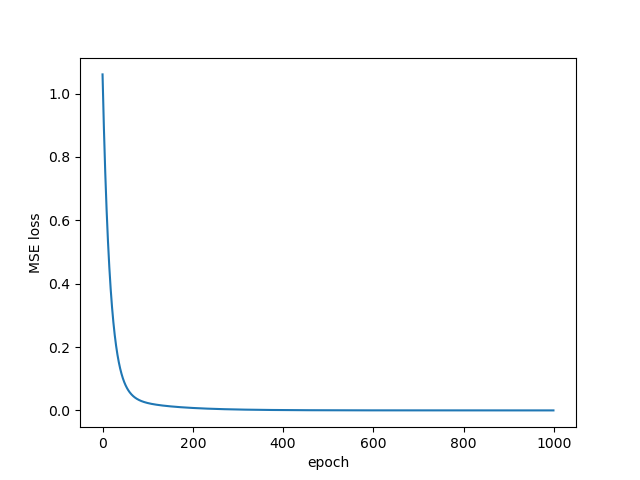

In [10]:
# Visualize MSE loss values over time
fig = plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('MSE loss')

**f. Make prediction**

In [19]:
# Run model forward
y_pred_scaled = model(torch.tensor(x_scaled, dtype=torch.float)).detach().numpy()

# Scale output back to original range
y_pred = output_scaler.inverse_transform(y_pred_scaled)

print(y_pred)

[[-19.931768 ]
 [-11.963268 ]
 [ -4.281882 ]
 [  3.9882126]
 [ 11.948025 ]]


C:\Users\nguye\AppData\Local\Temp\ipykernel_33956\2700793302.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_scaled = model(torch.tensor(x_scaled, dtype=torch.float)).detach().numpy()


In [11]:
# Input for prediction
x_pred = [8, 1]

# Scale input to range 0 to 1
x_pred_scaled = input_scaler.transform([x_pred])

# Convert to tensor
x_pred_scaled = torch.tensor(x_pred_scaled).float()

# Run model forward
y_pred_scaled = model(x_pred_scaled)

# Convert back to number
y_pred_scaled = y_pred_scaled.item()

# Scale output back to original range
y_pred = output_scaler.inverse_transform([[y_pred_scaled]])[0][0]

# Show result
print(y_pred)

33.069413573741905


**g. Save and load model**

In [ ]:
# Save model
model_name = 'model_2'
file_name = f'./{model_name}_{num_epochs}.ckpt'
torch.save(model.state_dict(), file_name)

In [ ]:
# Load model
file_name = f'./{model_name}_2000.ckpt'
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(file_name))